In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os
import sys
import time
import random
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True)

In [2]:
# Load csv data
index = pd.read_csv("./LEGO_DATA/index.csv")
metadata = pd.read_csv("./LEGO_DATA/metadata.csv")

In [3]:
index.head(5)

,Unnamed: 0,path,class_id,train-valid
0,0,marvel/0001/001.jpg,1,train
1,1,marvel/0001/002.jpg,1,valid
2,2,marvel/0001/003.jpg,1,train
3,3,marvel/0001/004.jpg,1,train
4,4,marvel/0001/005.jpg,1,train


In [4]:
metadata.head(5)

,Unnamed: 0,class_id,lego_ids,lego_names,minifigure_name
0,0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN
1,1,2,[76115],['Spider Mech vs. Venom'],VENOM
2,2,3,[76115],['Spider Mech vs. Venom'],AUNT MAY
3,3,4,[76115],['Spider Mech vs. Venom'],GHOST SPIDER
4,4,5,[75208],"[""Yoda's Hut""]",YODA


In [5]:
complete_data = pd.merge(metadata, index, on="class_id", how="inner")
complete_data.head(5)

,Unnamed: 0_x,class_id,lego_ids,lego_names,minifigure_name,Unnamed: 0_y,path,train-valid
0,0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN,0,marvel/0001/001.jpg,train
1,0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN,1,marvel/0001/002.jpg,valid
2,0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN,2,marvel/0001/003.jpg,train
3,0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN,3,marvel/0001/004.jpg,train
4,0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN,4,marvel/0001/005.jpg,train


In [6]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0_x     172 non-null    int64 
 1   class_id         172 non-null    int64 
 2   lego_ids         172 non-null    object
 3   lego_names       172 non-null    object
 4   minifigure_name  172 non-null    object
 5   Unnamed: 0_y     172 non-null    int64 
 6   path             172 non-null    object
 7   train-valid      172 non-null    object
dtypes: int64(3), object(5)
memory usage: 12.1+ KB


In [7]:
complete_data["minifigure_name"].describe()

count            172
unique            16
top       SPIDER-MAN
freq              19
Name: minifigure_name, dtype: object

In [8]:
complete_data["minifigure_name"].unique()

array(['SPIDER-MAN', 'VENOM', 'AUNT MAY', 'GHOST SPIDER', 'YODA',
       'LUKE SKYWALKER', 'R2-D2', 'MACE WINDU', 'GENERAL GRIEVOUS',
       'KYLO REN', 'THE MANDALORIAN', 'CARA DUNE', 'KLATOOINIAN RAIDER 1',
       'KLATOOINIAN RAIDER 2', 'MYSTERIO', 'FIREFIGHTER'], dtype=object)

In [9]:
complete_data.drop(["Unnamed: 0_x", "Unnamed: 0_y", "lego_ids"], axis=1, inplace=True)

In [10]:
complete_data.head(5)

,class_id,lego_names,minifigure_name,path,train-valid
0,1,['Spider Mech vs. Venom'],SPIDER-MAN,marvel/0001/001.jpg,train
1,1,['Spider Mech vs. Venom'],SPIDER-MAN,marvel/0001/002.jpg,valid
2,1,['Spider Mech vs. Venom'],SPIDER-MAN,marvel/0001/003.jpg,train
3,1,['Spider Mech vs. Venom'],SPIDER-MAN,marvel/0001/004.jpg,train
4,1,['Spider Mech vs. Venom'],SPIDER-MAN,marvel/0001/005.jpg,train


In [11]:
fig_names = complete_data["minifigure_name"].unique()
targets = {name:idx for idx, name in enumerate(fig_names)}
complete_data["target"] = complete_data["minifigure_name"].map(targets)
complete_data.head(5)

,class_id,lego_names,minifigure_name,path,train-valid,target
0,1,['Spider Mech vs. Venom'],SPIDER-MAN,marvel/0001/001.jpg,train,0
1,1,['Spider Mech vs. Venom'],SPIDER-MAN,marvel/0001/002.jpg,valid,0
2,1,['Spider Mech vs. Venom'],SPIDER-MAN,marvel/0001/003.jpg,train,0
3,1,['Spider Mech vs. Venom'],SPIDER-MAN,marvel/0001/004.jpg,train,0
4,1,['Spider Mech vs. Venom'],SPIDER-MAN,marvel/0001/005.jpg,train,0


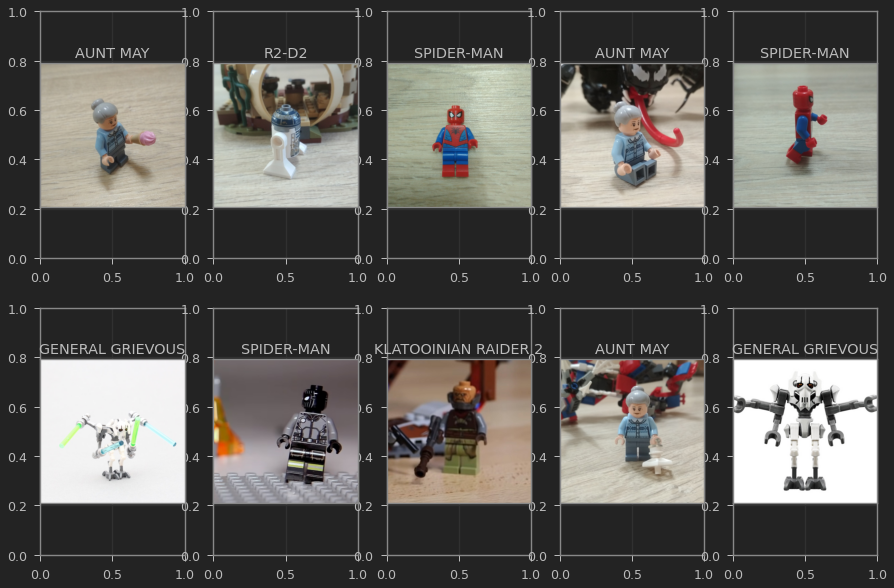

In [12]:
fig , axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))

fig_names = complete_data["minifigure_name"].values
img_path = complete_data["path"].values

shuffler = list(zip(fig_names, img_path))
np.random.shuffle(shuffler)
fig_names, img_path = zip(*shuffler)

for i in range(1, 11):
    ax = fig.add_subplot(2, 5, i)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(fig_names[i - 1])
    img = np.asarray(Image.open('./LEGO_DATA/'+img_path[i-1]))
    plt.imshow(img)
plt.show()
    

In [13]:
# Check the dimension of the images
img = np.asarray(Image.open("./LEGO_DATA/marvel/0001/001.jpg"))
print(img.shape)

(512, 512, 3)


In [23]:
# Create a numpy array to hold the image values
Xtrain = []
Xval = []

trainpaths = complete_data.loc[complete_data["train-valid"] == "train", "path"].values
valpaths = complete_data.loc[complete_data["train-valid"] == "valid", "path"].values

Ytrain =  complete_data.loc[complete_data["train-valid"] == "train", "target"].values
Yval = complete_data.loc[complete_data["train-valid"] == "valid", "path"].values


for paths in trainpaths:
    img = Image.open("./LEGO_DATA/{}".format(paths))
    if np.array(img).shape[0] != 512 and np.array(img).shape[1] != 512:
        img = img.resize((512, 512))
        
    Xtrain.append(np.asarray(img))
    
for paths in valpaths:
    img = Image.open("./LEGO_DATA/{}".format(paths))
    if np.array(img).shape[0] != 512 and np.array(img).shape[1] != 512:
        img = img.resize((512, 512))
        
    Xval.append(np.asarray(img))


Text(0.5, 1.0, 'AUNT MAY')

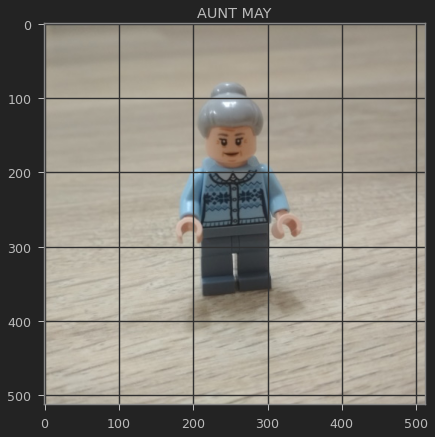

In [29]:
plt.imshow(Xtrain[11])
plt.title(complete_data.loc[complete_data["train-valid"] == "train", "minifigure_name"].values[11])

Text(0.5, 1.0, 'AUNT MAY')

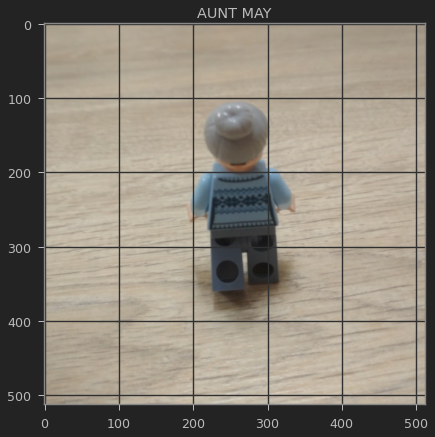

In [30]:
plt.imshow(Xval[11])
plt.title(complete_data.loc[complete_data["train-valid"] == "valid", "minifigure_name"].values[11])